<a href="https://colab.research.google.com/github/Hasanen99/ML-Homeworks-AIDOJO/blob/main/Assignment_9_Hasanen_A_Sahib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 09: More Advanced DL Applications

This Week's assignment is to train forecasting model on the `Daily Temperature Data`.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 09: More Advanced DL Applications - Zahraa Dhafer).
<br><br>
**Submission Deadline: Saturday, 3/19/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries.
2. Download the dataset (the link is provided below).
3. Read data from CSV file.
4. Prepare the data:
*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the dataset.
*   Plot the histogram of the dataset before and after the normalization.
<br>
5. Create the time series dataset using Time Series Data Generator.
6. Create data from the generator and split the data into training and testing.
7. Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1).
8. Get the max value of the dataset.
9. Create the Data Pipeline.
10. Create the Forecasting Model.<br>
11. Plot the model prediction.
**Note**: Use Adam optimizer and the appropriate loss function.


**Note:** To get the best performance from the model, manually tune the hyperparameters of the model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/1OfPmlyGP-1gy_2pfErdQMTtAvCY1jgy-?usp=sharing)<br>

[Dataset](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSdFXlEVjD1HPK_DMBbXjJ6XERmAVUpfqX9n-b0nFuCT9HpjYQ/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

##1- Import all necessary libraries

In [ ]:
# write your code below
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import model_selection
import tensorflow as tf
import matplotlib.pyplot as plt

##2- Download the dataset

In [ ]:
# write your code below
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities

 70% 9.00M/12.9M [00:00<00:00, 93.4MB/s]
100% 12.9M/12.9M [00:00<00:00, 115MB/s] 


In [ ]:
!unzip /content/daily-temperature-of-major-cities.zip

Archive:  /content/daily-temperature-of-major-cities.zip
  inflating: city_temperature.csv    


##3- Read data from CSV file

In [ ]:
# write your code below

DF=pd.read_csv('/content/city_temperature.csv')
DF

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [ ]:
print(f"Number of countries: {len(set(DF['Country']))} ")

Number of countries: 125 


##4- Prepare the data



*   Use the data from Spain using the query method in the Country column.
*   Drop the columns that are not required.
*   Normalize the datase.
*   Plot the histagram of the dataset before and after the normalization.

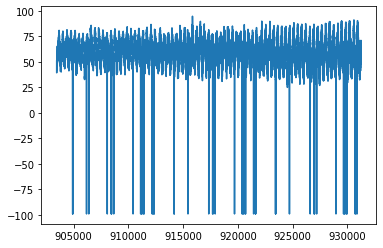

In [ ]:
# write your code below
Temp=DF[DF['Country']=='Spain']['AvgTemperature']
Temp.plot() #Befor Normalization

In [ ]:
data_nor=preprocessing.MinMaxScaler()
data_nor.fit(Temp.to_numpy().reshape(-1, 1))
norm_data=data_nor.transform(Temp.to_numpy().reshape(-1, 1))
norm_data

array([[0.77376033],
       [0.74121901],
       [0.7231405 ],
       ...,
       [0.82438017],
       [0.79700413],
       [0.77840909]])

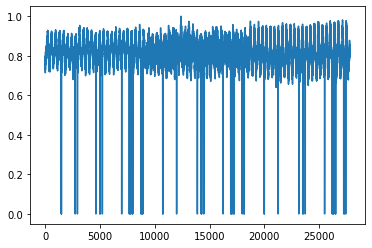

In [ ]:
plt.plot(norm_data)

##5- Create the time series dataset using Time Series Data Generator

In [ ]:
# write your code below
LEN=30
data_gen=tf.keras.preprocessing.sequence.TimeseriesGenerator(norm_data,Temp.to_numpy(),length=LEN)
data_gen

##6- Create data from the generator and split the data into training and testing

In [ ]:
# write your code below
x_data=np.array([])
y_data=np.array([])
for x,y in data_gen:
  x_data=np.append(x_data,x)
  y_data=np.append(y_data,y)

##7- Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1)

In [ ]:
x_data.shape,y_data.shape

((833040,), (27768,))

In [ ]:
# write your code below
x_data=x_data.reshape(-1,LEN,1)
x_data.shape

(27768, 30, 1)

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_data,y_data,test_size=0.1,random_state=42)

##8- Get the max value of the dataset

In [ ]:
# write your code below
Data_max=np.max(Temp)
Data_max

94.6

##9- Create the Data Pipeline

In [ ]:
# write your code below
def pipline(x,y):
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(2056)
  data=data.batch(32)
  data=data.prefetch(tf.data.AUTOTUNE)
  return data

In [ ]:
train_dataset=pipline(x_train,y_train)
test_dataset=pipline(x_test,y_test)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
for x,y in train_dataset.take(1):
  # plt.subplot(1,2,1)
  # plt.plot(x[0])
  # plt.subplot(1,2,2)
  # plt.plot(y)
  print(x[0],'\n\n',x[1])

tf.Tensor(
[[0.80836777]
 [0.80785124]
 [0.81456612]
 [0.79907025]
 [0.80733471]
 [0.77892562]
 [0.7732438 ]
 [0.78615702]
 [0.80991736]
 [0.8125    ]
 [0.82438017]
 [0.83161157]
 [0.83677686]
 [0.82076446]
 [0.82334711]
 [0.82696281]
 [0.83471074]
 [0.84142562]
 [0.82696281]
 [0.82283058]
 [0.81095041]
 [0.80836777]
 [0.80940083]
 [0.81559917]
 [0.82386364]
 [0.83419421]
 [0.82954545]
 [0.78873967]
 [0.77376033]
 [0.79700413]], shape=(30, 1), dtype=float64) 

 tf.Tensor(
[[0.8946281 ]
 [0.88068182]
 [0.87448347]
 [0.8589876 ]
 [0.85278926]
 [0.84917355]
 [0.86466942]
 [0.87758264]
 [0.875     ]
 [0.86002066]
 [0.85795455]
 [0.86157025]
 [0.85485537]
 [0.83987603]
 [0.84194215]
 [0.85433884]
 [0.85485537]
 [0.87086777]
 [0.88378099]
 [0.87396694]
 [0.87809917]
 [0.88533058]
 [0.89204545]
 [0.90289256]
 [0.89049587]
 [0.87603306]
 [0.8677686 ]
 [0.87190083]
 [0.87603306]
 [0.86518595]], shape=(30, 1), dtype=float64)


##10- Create the Forcasting Model

In [ ]:
# write your code below
model_forcast=tf.keras.Sequential([
                                 tf.keras.layers.Input((LEN,1)),
                                 tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation=tf.nn.leaky_relu,padding='causal'),
                                 tf.keras.layers.Bidirectional((tf.keras.layers.GRU(128,return_sequences=True))),
                                 tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
                                 tf.keras.layers.Dense(1),
                                 tf.keras.layers.Lambda(lambda x:x*Data_max)
])

model_forcast.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
model_forcast.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 30, 16)            64        
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 256)          112128    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 235,969
Trainable params: 235,969
Non-tr

In [ ]:
model_forcast.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
781/781 [==============================] - 97s 107ms/step - loss: 4.6828 - val_loss: 2.7072
Epoch 2/10
781/781 [==============================] - 87s 111ms/step - loss: 2.9044 - val_loss: 2.8405
Epoch 3/10
781/781 [==============================] - 74s 94ms/step - loss: 2.8276 - val_loss: 2.8971
Epoch 4/10
781/781 [==============================] - 76s 97ms/step - loss: 2.7583 - val_loss: 2.8105
Epoch 5/10
781/781 [==============================] - 74s 95ms/step - loss: 2.7543 - val_loss: 2.5100
Epoch 6/10
781/781 [==============================] - 74s 95ms/step - loss: 2.7345 - val_loss: 3.1422
Epoch 7/10
781/781 [==============================] - 74s 95ms/step - loss: 2.7075 - val_loss: 2.4864
Epoch 8/10
781/781 [==============================] - 74s 94ms/step - loss: 2.6619 - val_loss: 2.5252
Epoch 9/10
781/781 [==============================] - 73s 94ms/step - loss: 2.6911 - val_loss: 2.7671
Epoch 10/10
781/781 [==============================] - 74s 95ms/step - loss: 2.6

##11- Plot the model prediction

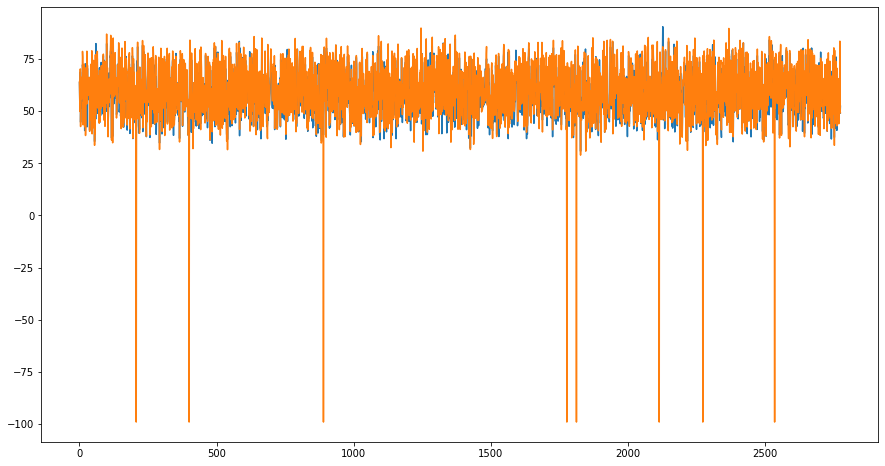

In [ ]:
# write your code below
ypred=model_forcast.predict(x_test)
plt.figure(figsize=(15,8))
plt.plot(ypred)
plt.plot(y_test)

**We notice that the Plot is too close to the actual one**